<a href="https://colab.research.google.com/github/Devyani273/Exploratory-Data-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Importing Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mounting Drive**

In [42]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


### **Reading both CSV Files From Drive and storing in dataframe**

In [43]:
ps_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv'
ur_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv'
ps_df = pd.read_csv(ps_file_path)
ur_df = pd.read_csv(ur_file_path)

# **Exploring Dataset**

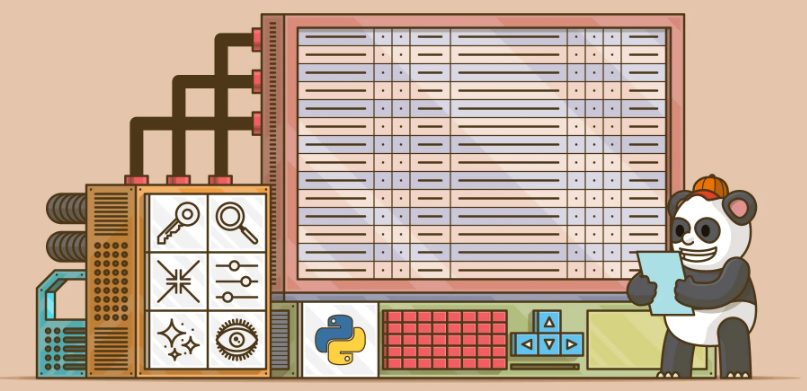

In [44]:
# Shape of the play store dataframe.
ps_df.shape

(10841, 13)

In [45]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [46]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [47]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [48]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [49]:
#Checking how many values are not numeric in Reviews column in the Data Frame.
ps_df[~ps_df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In index number 10472 values are incorrectly filled in the dataframe. Correcting the data as per the values present in the dataframe.

In [124]:
ps_df.loc[10472,['Category']] = 'No Category'
ps_df.loc[10472,['Rating']] = 1.9
ps_df.loc[10472,['Reviews']] = 19
ps_df.loc[10472,['Size']] = '3.0M' 
ps_df.loc[10472,['Installs']] = '1000+'
ps_df.loc[10472,['Type']] = 'Free'
ps_df.loc[10472,['Price']] = '0'
ps_df.loc[10472,['Content Rating']] = 'Everyone'
ps_df.loc[10472,['Genres']] = 'No Genres'
ps_df.loc[10472,['Last Updated']] = 'February 11, 2018'
ps_df.loc[10472,['Current Ver']] = '1.0.19'
ps_df.loc[10472,['Android Ver']] = '4.0 and up'



In [125]:
#Converting Reviews column to int type from object.
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [126]:
#Checking the unique values
ps_df['Size'].unique()

array([27.0, 3.6, 44.622387295081964, 71.0, 33.0, 4.0, 7.4, 48.0, 76.0,
       12.0, 9.7, 8.661628169014085, 25.0, 14.0, 24.0, 2.3, 37.0, 2.2,
       28.542725423728815, 23.0, 2.5, 62.0, 11.0, 31.0, 6.3,
       13.051029702970297, 7.7, 7.0, 19.0, 98.0, 89.0, 12.835827118644067,
       69.0, 2.7, 16.196305, 51.0, 36.0, 24.568406716417908,
       18.138282828282826, 29.0, 10.0, 94.0, 7.2, 24.714712707182322,
       13.0, 16.0, 35.0, 16.299844961240307, 17.520915322580645, 21.0,
       5.8, 22.0, 38.0, 66.0, 42.0, 15.0, 18.0, 20.0, 8.2, 5.1, 17.0,
       63.0, 34.0, 28.0, 26.0, 55.0, 7.3, 14.799909090909091,
       17.95801463414634, 40.0, 9.0, 13.209803921568628, 9.9, 9.1,
       16.714548076923077, 4.1, 57.0, 43.0, 8.7, 8.0, 3.3, 3.8, 6.5, 6.1,
       22.890597701149424, 9.8, 2.6, 39.0, 4.5, 3.0, 8.4, 59.0, 4.6,
       16.697715639810426, 47.0, 6.4, 1.8, 6.9, 46.0, 45.0,
       21.85333333333333, 7.5, 20.430569444444444, 6.7, 68.0,
       19.37617523364486, 11.417817629179332, 90.0, 5.0

In [127]:
#Converting all the data to Mb
for data in ps_df['Size']:
  if 'k' in str(data):
    new_data = float(data[:-1])/1000
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)
  elif 'M' in str(data):
    new_data = float(data[:-1])
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)

In [128]:
#Converting Size column to numeric/float type
ps_df['Size'] = ps_df['Size'].replace("Varies with device",np.nan)
ps_df['Size'] = pd.to_numeric(ps_df['Size'])

In [129]:
#Converting Price column to numeric/float type
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [130]:
#Converting Installs column to numeric/float type.
ps_df['Installs'] = ps_df['Installs'].str.replace('+','')
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [131]:
#Converting data in Last Updated column from string to Timestamp.
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])
ps_df['Last Updated']

10408   2018-08-08
10209   2018-08-08
9636    2018-08-07
10186   2018-08-07
3679    2018-08-07
           ...    
8084    2011-04-16
8418    2011-04-11
10282   2011-03-16
7430    2011-01-30
7479    2010-05-21
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

In [132]:
#Checking the info of the Dataframe again to make sure the columns Datatype has been changed.
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10408 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        1 non-null      float64       
 6   Type            9660 non-null   object        
 7   Price           1 non-null      float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [133]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9660.000000,1.0,1.0
mean,4.090192,2.157167e+05,19.695161,1000.0,0.0
std,0.650524,1.830828e+06,20.622665,NaN,NaN
min,1.000000,0.000000e+00,0.008500,1000.0,0.0
25%,4.000000,1.900000e+01,4.600000,1000.0,0.0
50%,4.200000,8.515000e+02,13.000000,1000.0,0.0
75%,4.500000,2.839050e+04,26.000000,1000.0,0.0
max,5.000000,7.815831e+07,100.000000,1000.0,0.0


# **Cleaning The Data**

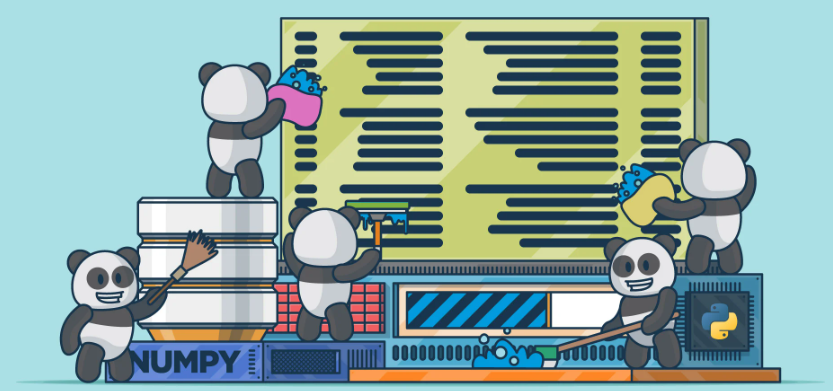

In [134]:
# Checking the number of null values in each columns.
ps_df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs          9659
Type                 0
Price             9659
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [135]:
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [136]:
ps_df['Type'].fillna('Free',inplace=True)

In [137]:
#Checking in which row of column 'Type' Null is coming.
ps_df[ps_df['Type'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Since there is only one row in the dataset for which column 'Type' has NaN and the 'price' of the app is $0 so we can set the 'Type' to Free.

In [138]:
#Filling NaN with 'Free' in Type column for row 9148.
ps_df['Type'].fillna('Free',inplace = True)

For 'Rating' and 'Size' column the best way to replace the NaN values is to replace them with the mean of the Rating and Size for each category. 
For e.g. - If NaN is present in certain row under Size which belongs to the category FAMILY then this NaN will be replaced by the mean of the app Size which belongs to the FAMILY category.
So we are replacing the NaN values based on the mean grouped by 'Category'.

In [139]:
# Defining the function to replace the NaN value.
def filling_null_values_for_numerical_columns(col):
  ps_df[col].fillna(ps_df.groupby('Category')[col].transform('mean'), inplace = True)

In [140]:
def replacing_null_values(col1):
  ps_df[col1].fillna(ps_df.groupby('Category')[col1].transform('mean'),inplace=True)

In [141]:
for n in ['Size','Rating']:
 replacing_null_values(n)

In [142]:
# Replacing the NaN values from 'Rating' and 'Size'.
for column in ['Rating', 'Size']:
  filling_null_values_for_numerical_columns(column)

In [143]:
# Checking the number of null values in each columns after removing the null values from Type, Rating and Size.
ps_df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs          9659
Type                 0
Price             9659
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Checking for duplicate values in the dataset.

In [144]:
ps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,NaN,Free,NaN,Teen,Action,2018-08-08,1.1.2,4.1 and up
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6,NaN,Free,NaN,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up


In [145]:
ps_df['App'].value_counts()

Shoot Hunter-Gun Killer                    1
Ba Zi Fortune                              1
The Visitor: Ep.2 - Sleepover Slaughter    1
SH Script Runner                           1
Dr. Shogi                                  1
                                          ..
Orfox: Tor Browser for Android             1
DO YOU KNOW THE WAY Soundboard             1
3D Blue Glass Water Keyboard Theme         1
Bengali Newspaper - The first L.           1
FML F*ck my life + widget                  1
Name: App, Length: 9660, dtype: int64

From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.

In [146]:
#Sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [147]:
# Deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

Checking the number of null values in user_review dataframe.

In [148]:
ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [149]:
#Removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [150]:
ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [151]:
# Info of the play_store dataframe after cleaning the data.
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10408 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        1 non-null      float64       
 6   Type            9660 non-null   object        
 7   Price           1 non-null      float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [152]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [153]:
# Describing the data after cleaning.
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9660.000000,1.0,1.0
mean,4.090192,2.157167e+05,19.695161,1000.0,0.0
std,0.650524,1.830828e+06,20.622665,NaN,NaN
min,1.000000,0.000000e+00,0.008500,1000.0,0.0
25%,4.000000,1.900000e+01,4.600000,1000.0,0.0
50%,4.200000,8.515000e+02,13.000000,1000.0,0.0
75%,4.500000,2.839050e+04,26.000000,1000.0,0.0
max,5.000000,7.815831e+07,100.000000,1000.0,0.0


# **Visualizing Data**

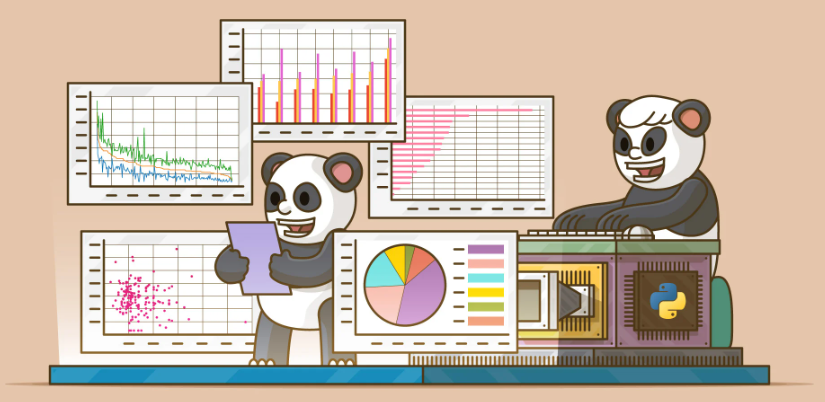

In [154]:
ps_df.Category.unique()

array(['GAME', 'TOOLS', 'FAMILY', 'COMMUNICATION', 'SOCIAL',
       'HEALTH_AND_FITNESS', 'LIFESTYLE', 'NEWS_AND_MAGAZINES',
       'BUSINESS', 'AUTO_AND_VEHICLES', 'SPORTS', 'PARENTING',
       'MAPS_AND_NAVIGATION', 'VIDEO_PLAYERS', 'WEATHER', 'FINANCE',
       'SHOPPING', 'TRAVEL_AND_LOCAL', 'PHOTOGRAPHY', 'FOOD_AND_DRINK',
       'PRODUCTIVITY', 'PERSONALIZATION', 'MEDICAL', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'HOUSE_AND_HOME', 'EDUCATION', 'DATING',
       'ENTERTAINMENT', 'EVENTS', 'ART_AND_DESIGN', 'COMICS',
       'LIBRARIES_AND_DEMO', 'No Category'], dtype=object)

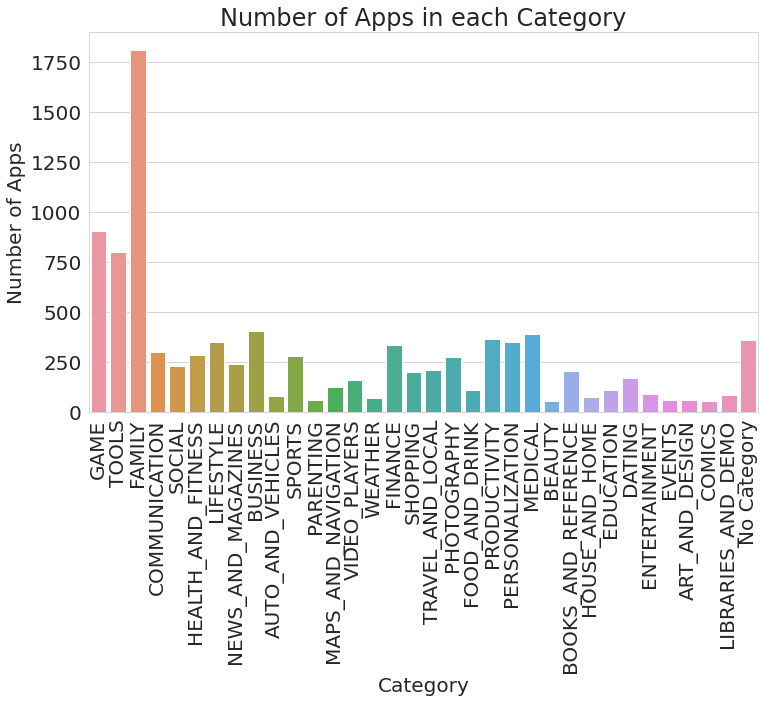

In [155]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.countplot(x='Category',data=ps_df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


In [156]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [157]:
ps_df.App.nunique()

9660

In [158]:
ps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,NaN,Free,NaN,Teen,Action,2018-08-08,1.1.2,4.1 and up
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6,NaN,Free,NaN,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up


In [159]:
rating_categorywise=ps_df.groupby('Category',as_index=False)['Rating'].mean()

rating_categorywise

,Category,Rating
0,ART_AND_DESIGN,4.364776
1,AUTO_AND_VEHICLES,4.184722
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.351110
4,BUSINESS,4.099917
5,COMICS,4.195215
6,COMMUNICATION,4.131982
7,DATING,3.985228
8,EDUCATION,4.356780
9,ENTERTAINMENT,4.123596


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

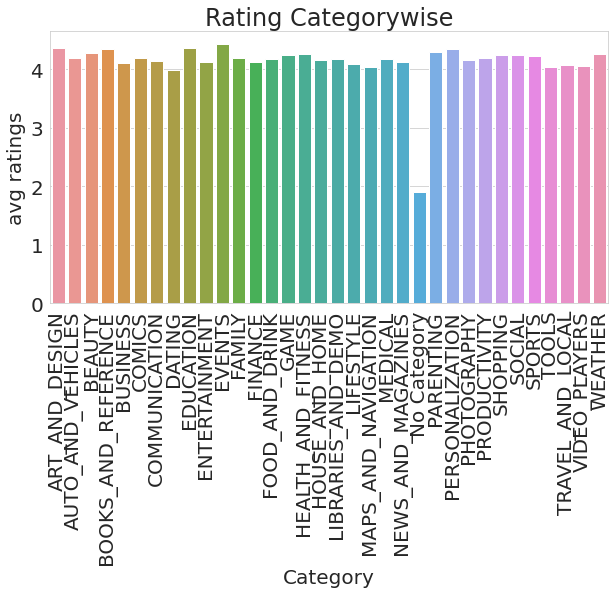

In [160]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x='Category', y='Rating', data=rating_categorywise)
plt.title('Rating Categorywise')
plt.ylabel('avg ratings')
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


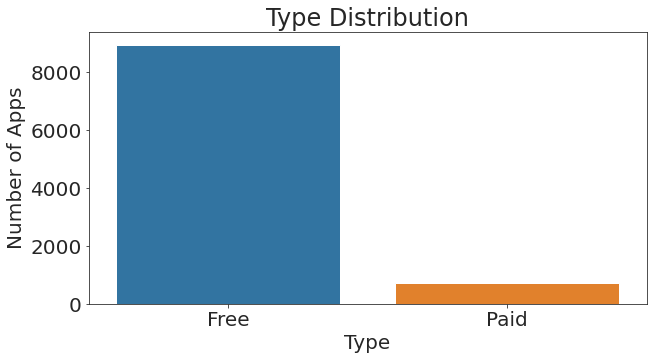

In [161]:
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 5)
#plt.figure(figsize=(10, 5))
sns.countplot(ps_df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()


In [162]:
Installs_in_each_type=ps_df.groupby(['Installs','Type'])['Installs'].count().unstack()

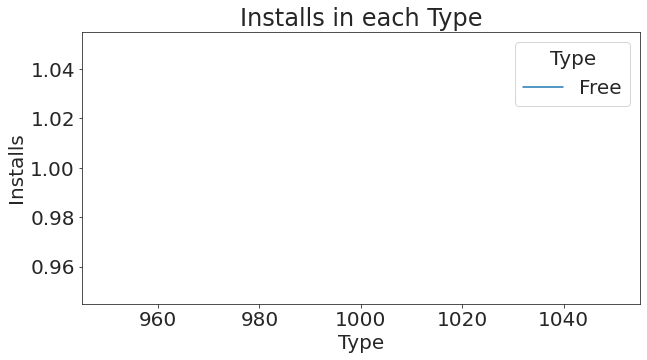

In [163]:
Installs_in_each_type.plot()

plt.title('Installs in each Type')
plt.ylabel('Installs')
plt.xlabel('Type')
plt.rcParams['figure.figsize'] = (10, 5)


In [164]:
installs_in_each_category=ps_df.groupby('Category')['Installs'].count()
installs_in_each_category



Category
ART_AND_DESIGN         0
AUTO_AND_VEHICLES      0
BEAUTY                 0
BOOKS_AND_REFERENCE    0
BUSINESS               0
COMICS                 0
COMMUNICATION          0
DATING                 0
EDUCATION              0
ENTERTAINMENT          0
EVENTS                 0
FAMILY                 0
FINANCE                0
FOOD_AND_DRINK         0
GAME                   0
HEALTH_AND_FITNESS     0
HOUSE_AND_HOME         0
LIBRARIES_AND_DEMO     0
LIFESTYLE              0
MAPS_AND_NAVIGATION    0
MEDICAL                0
NEWS_AND_MAGAZINES     0
No Category            1
PARENTING              0
PERSONALIZATION        0
PHOTOGRAPHY            0
PRODUCTIVITY           0
SHOPPING               0
SOCIAL                 0
SPORTS                 0
TOOLS                  0
TRAVEL_AND_LOCAL       0
VIDEO_PLAYERS          0
WEATHER                0
Name: Installs, dtype: int64

In [165]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10408,Shoot Hunter-Gun Killer,GAME,4.300000,320334,27.000000,NaN,Free,NaN,Teen,Action,2018-08-08,1.1.2,4.1 and up
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.300000,434,3.600000,NaN,Free,NaN,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
9620,Hello English: Learn English,FAMILY,4.600000,750321,28.542725,NaN,Free,NaN,Everyone,Education,2018-08-07,Varies with device,Varies with device
9597,Dragonplay™ Poker Texas Holdem,GAME,4.500000,197979,44.622387,NaN,Free,NaN,Teen,Card,2018-08-07,Varies with device,Varies with device
9298,[EF]ShoutBox,COMMUNICATION,4.162229,3,2.500000,NaN,Free,NaN,Teen,Communication,2018-08-07,Build 54,4.0.3 and up


In [166]:
installs_in_each_category=ps_df.groupby('Category')['Installs'].sum()
installs_in_each_category.reset_index()

,Category,Installs
0,ART_AND_DESIGN,0.0
1,AUTO_AND_VEHICLES,0.0
2,BEAUTY,0.0
3,BOOKS_AND_REFERENCE,0.0
4,BUSINESS,0.0
5,COMICS,0.0
6,COMMUNICATION,0.0
7,DATING,0.0
8,EDUCATION,0.0
9,ENTERTAINMENT,0.0


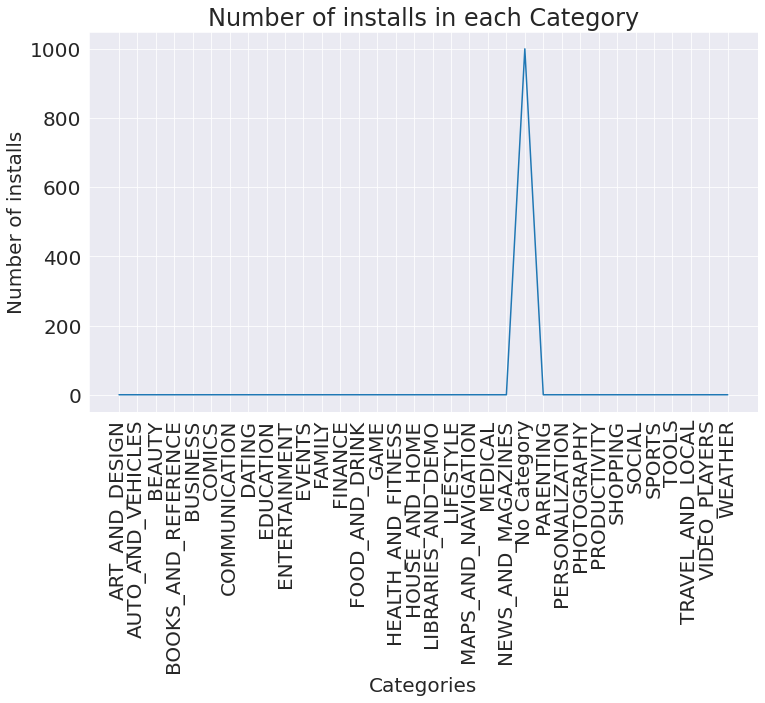

In [167]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 7))
plt.plot(installs_in_each_category)
plt.title('Number of installs in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of installs')
plt.xlabel('Categories')
plt.show()

In [168]:
ps_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.0,NaN,Free,NaN,Teen,Action,2018-08-08,1.1.2,4.1 and up
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6,NaN,Free,NaN,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


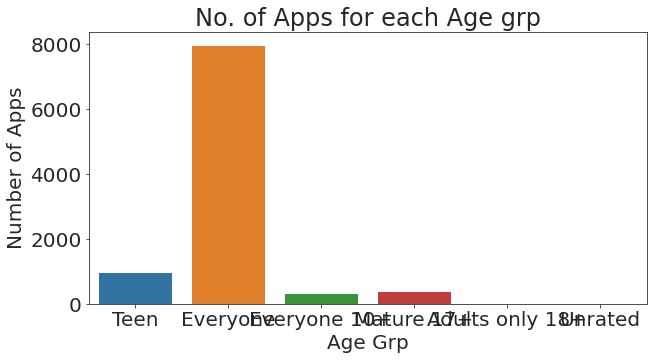

In [169]:
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 5)
#plt.figure(figsize=(10, 5))
sns.countplot(ps_df['Content Rating'])
plt.title('No. of Apps for each Age grp')
plt.ylabel('Number of Apps')
plt.xlabel('Age Grp')
plt.show()


In [170]:
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.056755,0.150717,NaN,NaN
Reviews,0.056755,1.000000,0.080696,NaN,NaN
Size,0.150717,0.080696,1.000000,NaN,NaN
Installs,NaN,NaN,NaN,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN


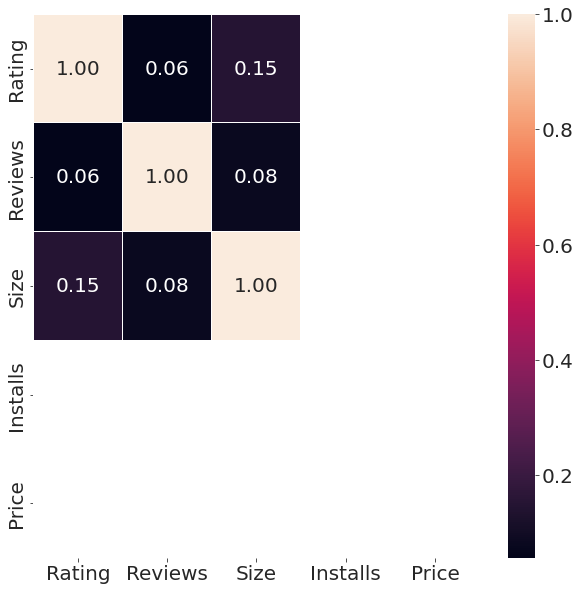

In [171]:
plt.figure(figsize = (10,10))
sns.heatmap(ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.rcParams['font.size'] = 15
plt.show()

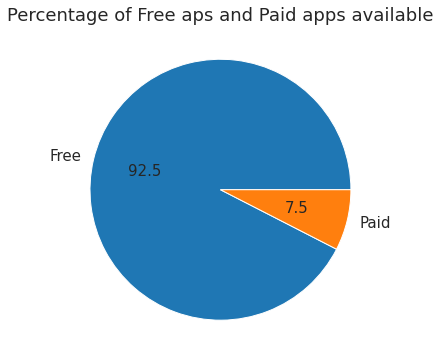

In [172]:
plt.figure(figsize = (6,6))
ps_df['Type'].value_counts().plot.pie(autopct = '%1.1f')
plt.title('Percentage of Free aps and Paid apps available')
plt.axis('off')
plt.rcParams['font.size'] = 20
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


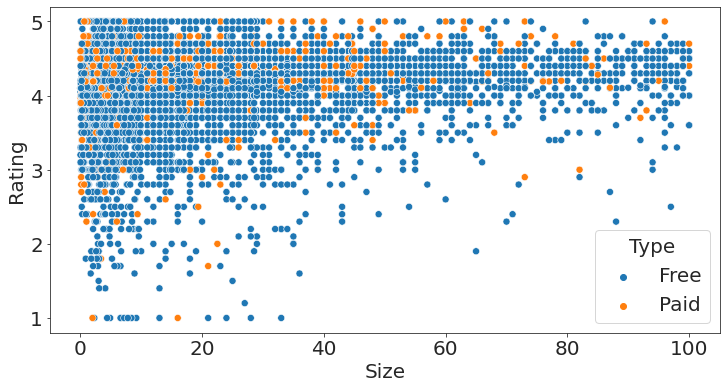

In [173]:
plt.figure(figsize=(12,6))
sns.scatterplot(ps_df['Size'],
               ps_df['Rating'],
               hue=ps_df['Type'],
               s=50)
plt.show()


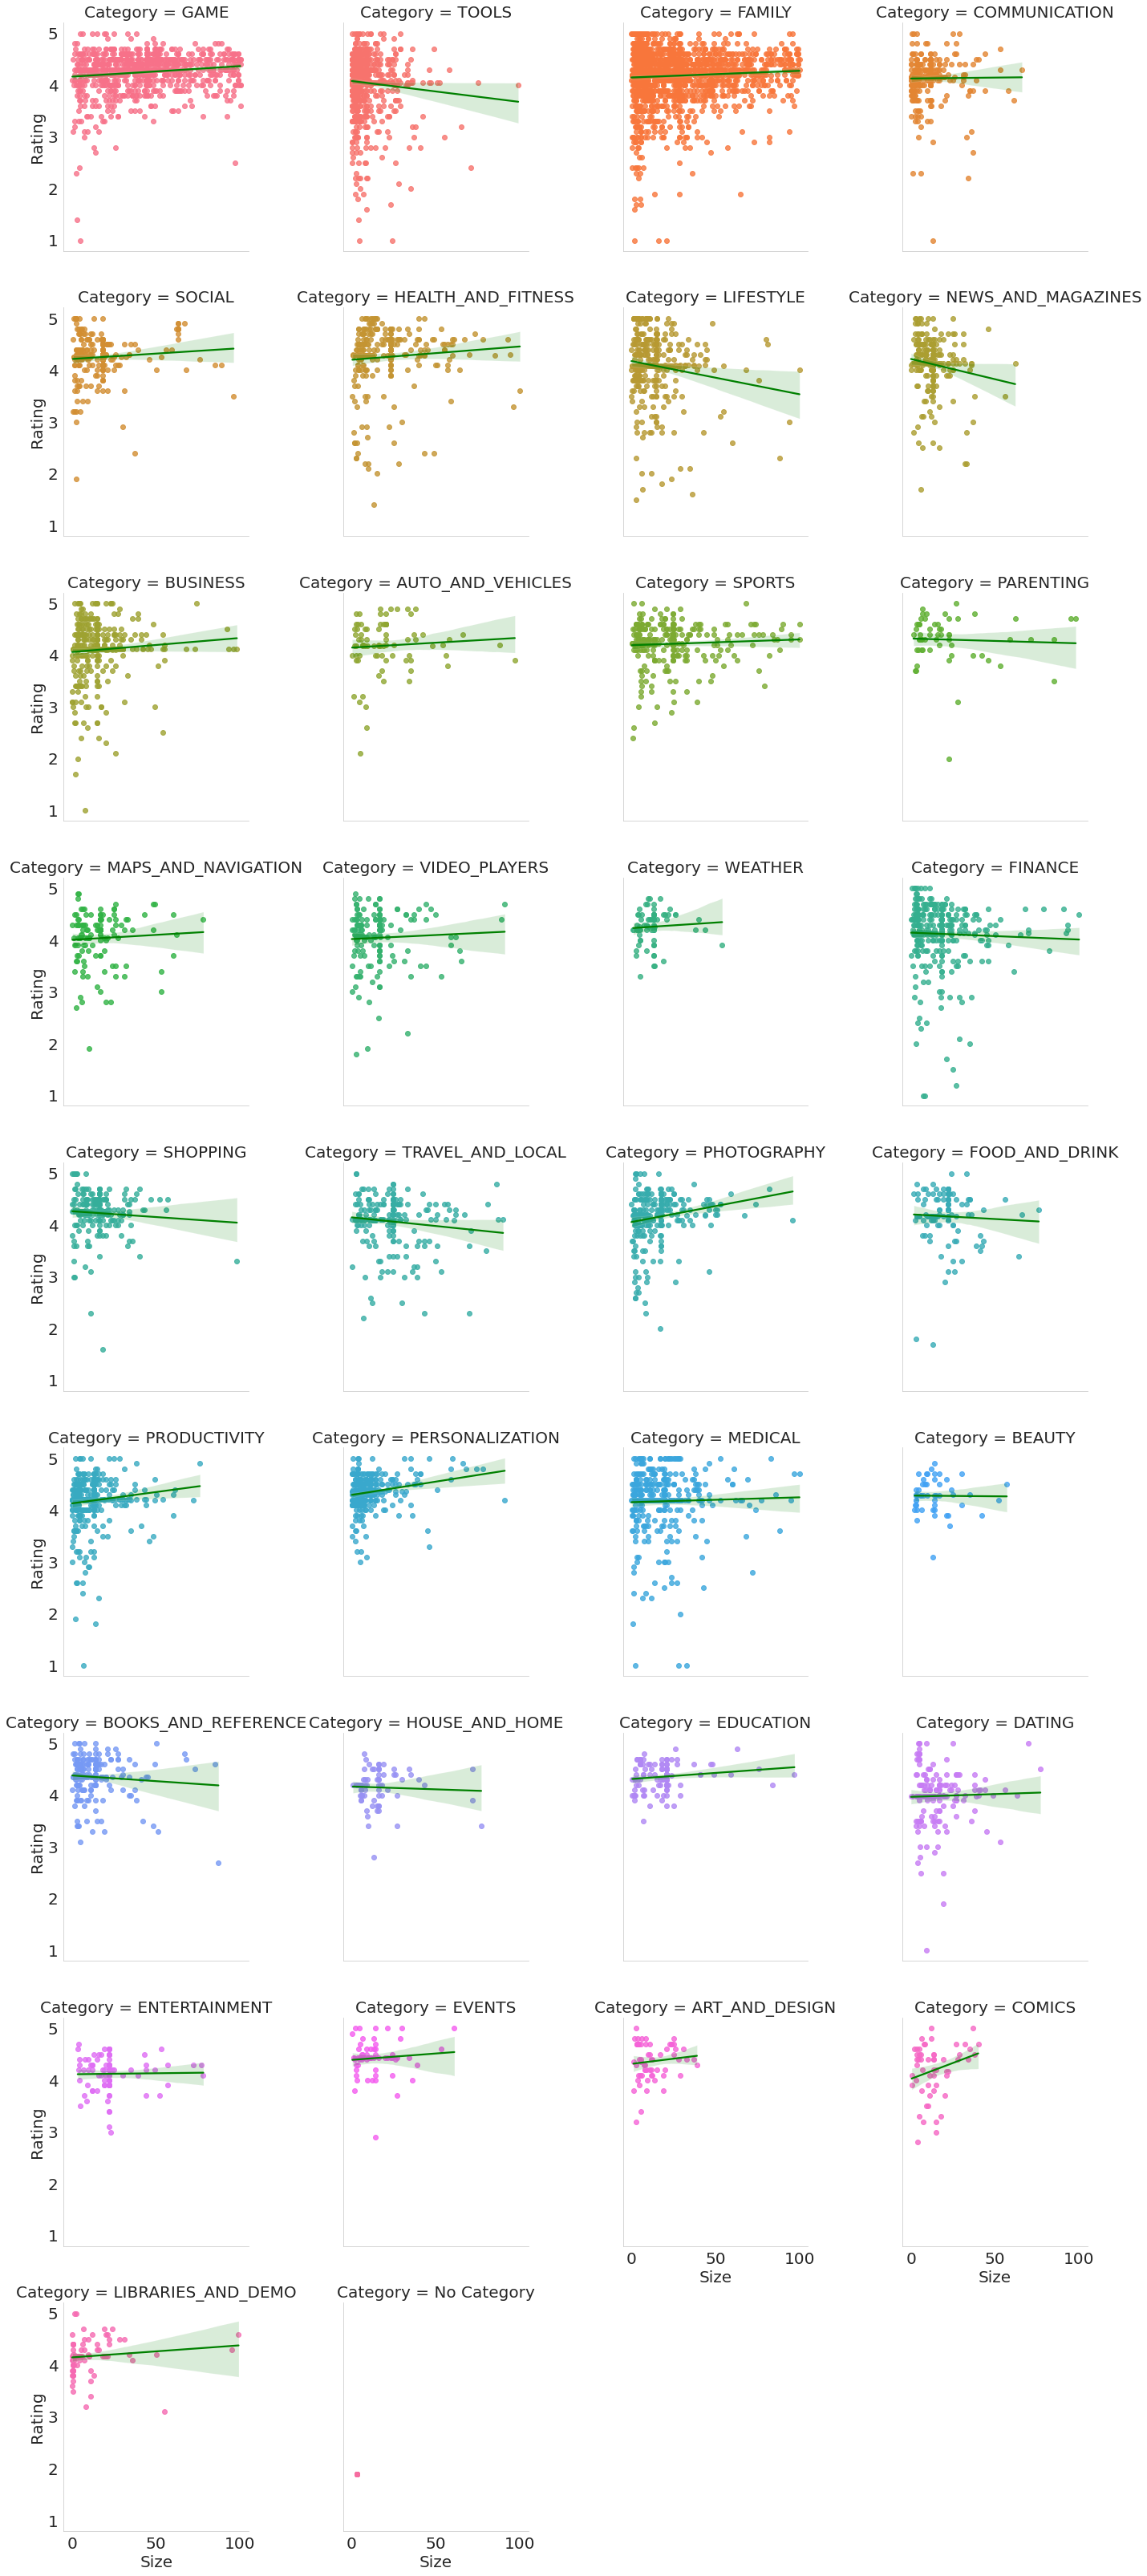

In [174]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=ps_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'green'})

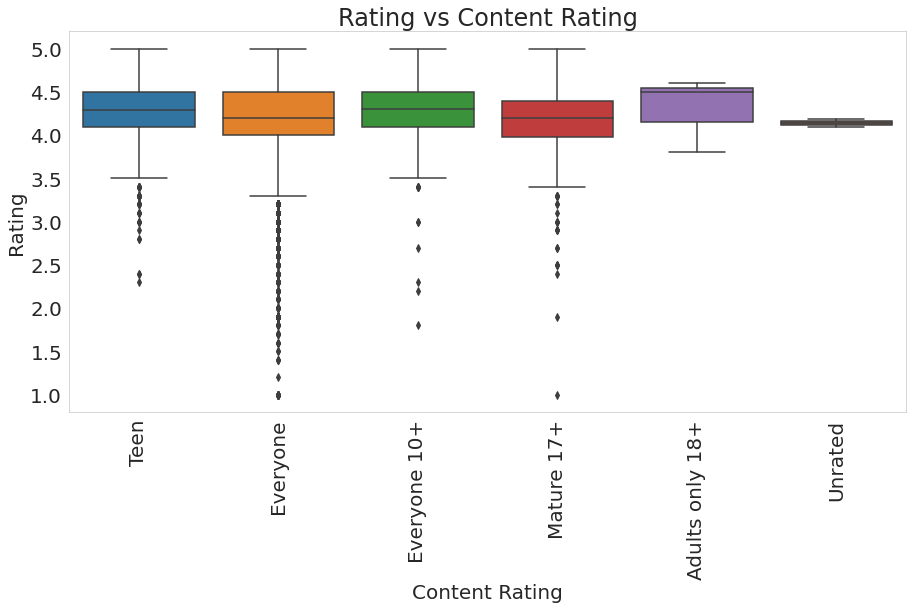

In [175]:
plt.figure(figsize=(15,7))
sns.boxplot(x = ps_df['Content Rating'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [176]:
merging_ps_ur_df = ps_df.merge(ur_df,on='App')

In [177]:
merging_ps_ur_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.000,NaN,Free,NaN,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up,This fun mess around explore! There many diffe...,Positive,0.304907,0.548554
1,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.000,NaN,Free,NaN,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up,"I think really good app. The layout nice, I ta...",Positive,0.276623,0.436364
2,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.000,NaN,Free,NaN,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up,"I've two acconts banned now. I follow rules, d...",Negative,-0.065278,0.543056
3,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.000,NaN,Free,NaN,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up,Amino amazing A LOT bugs. I'd rather fixed add...,Positive,0.082273,0.550909
4,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.000,NaN,Free,NaN,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up,"This terrible full paedophiles, sex addicted c...",Negative,-0.103333,0.543333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,0.292,NaN,Free,NaN,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up,Useless It useful qualities hence waste time,Negative,-0.133333,0.066667
35925,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,0.292,NaN,Free,NaN,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up,Useless final step installation working. Insta...,Negative,-0.250000,0.600000
35926,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,0.292,NaN,Free,NaN,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up,If uninstall game zipped never work forever. .,Negative,-0.400000,0.400000
35927,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750,0.292,NaN,Free,NaN,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up,Crap APK installer install APK files. Complete...,Negative,-0.650000,0.500000


In [178]:
merging_ps_ur_df['Sentiment'].value_counts().reset_index()

,index,Sentiment
0,Positive,23073
1,Negative,8005
2,Neutral,4851


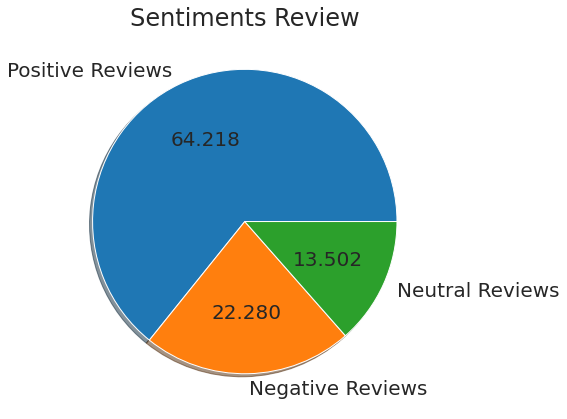

In [179]:
plt.figure(figsize = (7,7))
labels='Positive Reviews','Negative Reviews','Neutral Reviews'
merging_ps_ur_df['Sentiment'].value_counts().plot.pie(labels=labels,shadow=True,autopct = '%.3f')


plt.title('Sentiments Review')
plt.axis('off')
plt.rcParams['font.size'] = 20
plt.show()

# Q1-Which Category has the lowest overall rating?

In [180]:
categorywise_lowest_rating=ps_df.groupby(['Category','Genres'])['Rating'].mean().reset_index().sort_values(by='Rating')
#categorywise_lowest_rating.reset_index().sort_values(by='Rating')
categorywise_lowest_rating

,Category,Genres,Rating
121,No Category,No Genres,1.90
123,PARENTING,Parenting;Brain Games,3.80
28,FAMILY,Art & Design;Pretend Play,3.90
27,FAMILY,Art & Design;Creativity,3.90
63,FAMILY,Health & Fitness;Action & Adventure,3.90
...,...,...,...
14,EDUCATION,Education;Pretend Play,4.60
59,FAMILY,Entertainment;Creativity,4.65
64,FAMILY,Health & Fitness;Education,4.70
31,FAMILY,Board;Pretend Play,4.80


In [181]:
categorywise_lowest_rating['Category'].head(2)

121    No Category
123      PARENTING
Name: Category, dtype: object

# Q2- What are the categories of five most rated Apps?

In [182]:
most_ratedapp=ps_df.sort_values(by='Rating',ascending=False)
most_ratedapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,FAMILY,5.0,1,96.000,NaN,Paid,NaN,Mature 17+,Education,2016-01-19,3.30,4.0 and up
6727,BS-Mobile,COMMUNICATION,5.0,1,0.683,NaN,Free,NaN,Everyone,Communication,2015-09-03,0.1,2.3 and up
6852,BV,COMMUNICATION,5.0,3,1.600,NaN,Free,NaN,Everyone,Communication,2016-08-04,"1,01",3.0 and up
5238,Selfie With Champion AJ Style,PHOTOGRAPHY,5.0,2,7.500,NaN,Free,NaN,Everyone,Photography,2018-01-08,1.0,3.2 and up
9815,ES Solar,BUSINESS,5.0,3,4.700,NaN,Free,NaN,Everyone,Business,2018-05-17,1.2,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13.000,NaN,Free,NaN,Everyone,Communication,2017-10-06,1.0,4.1 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.000,NaN,Paid,NaN,Everyone,Education,2012-04-09,1.0,2.1 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16.000,NaN,Paid,NaN,Everyone,Education,2016-10-07,1.0,2.3.3 and up
8820,DS Creator 2.0,TOOLS,1.0,2,4.400,NaN,Free,NaN,Everyone,Tools,2018-03-23,2.0.180226.1,4.0 and up


In [183]:
most_ratedapp['Category'].head(5)

5489           FAMILY
6727    COMMUNICATION
6852    COMMUNICATION
5238      PHOTOGRAPHY
9815         BUSINESS
Name: Category, dtype: object

# Q3- What is the Genre of most installed App in Paid Type?


In [184]:
most_installed = ps_df[ps_df['Type'] == 'Paid']
most_installed = most_installed.sort_values(by=['Installs'],ascending=False)

In [185]:
most_installed['Genres'].head(2)


6766             Tools
7328    Travel & Local
Name: Genres, dtype: object

# Q4-which Category has the biggest avg size?

In [186]:
avg_size_of_each_category=ps_df.groupby('Category')['Size'].mean().reset_index()

In [187]:
avg_size_of_each_category.sort_values(by='Size',ascending=False).head(1)

,Category,Size
14,GAME,42.082069
